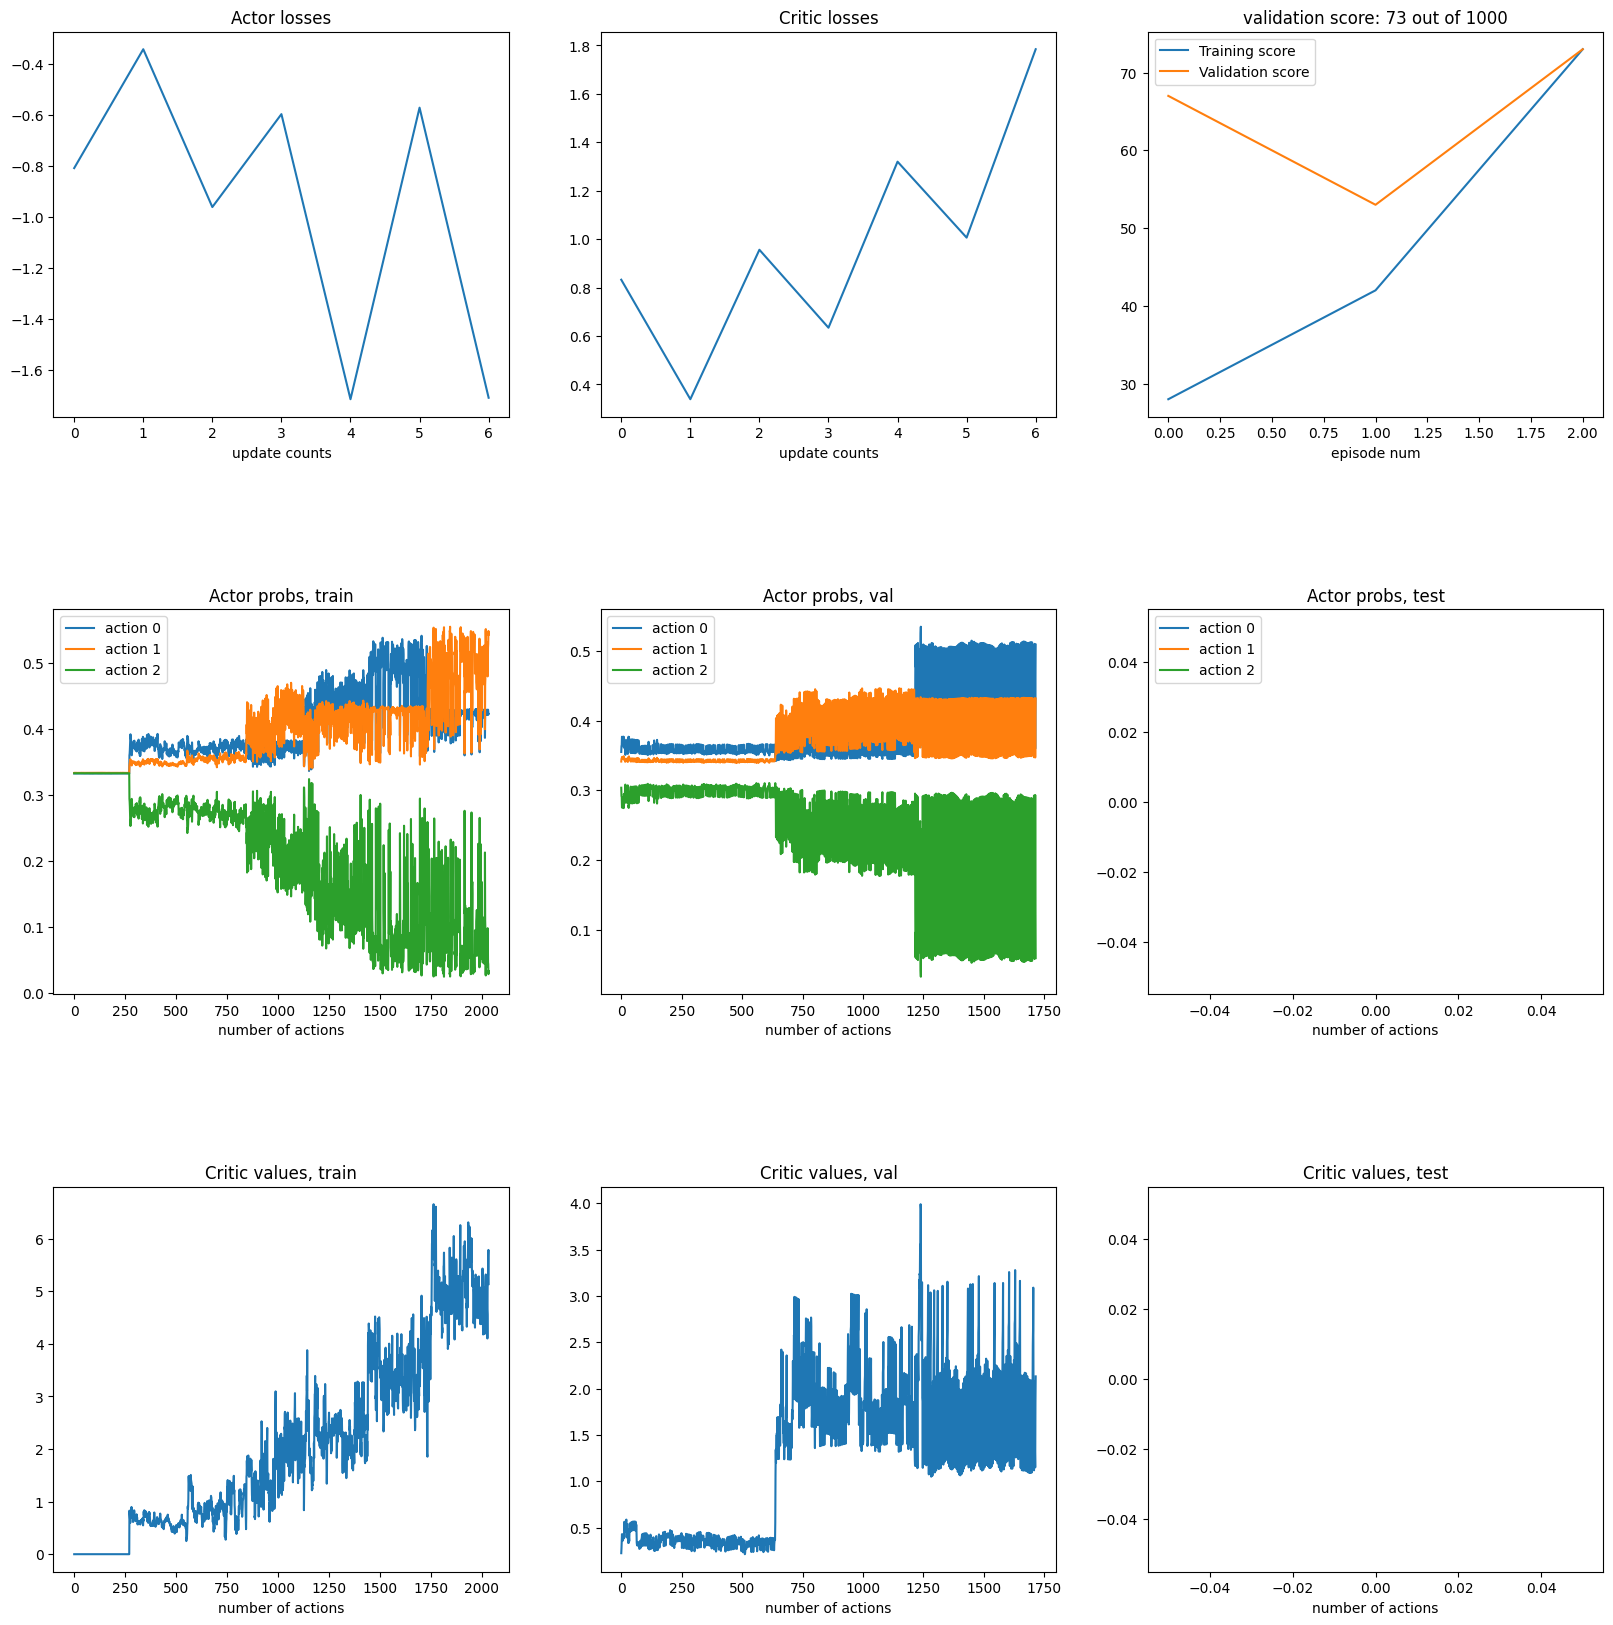

In [1]:
from agent import PPOMMAgent
import logging

logger = logging.getLogger()
logger.disabled = True

params = {
    "env_str": "room_env:RoomEnv-v2",
    "num_episodes": 4,
    "num_rollouts": 8,
    "epoch_per_rollout": 1,
    "batch_size": 4,
    "gamma": 0.99,
    "tau": 0.93,
    "epsilon": 0.25,
    "entropy_weight": 0.044,
    "capacity": {
        "episodic": 2,
        "episodic_agent": 0,
        "semantic": 2,
        "semantic_map": 0,
        "short": 1,
    },
    "pretrain_semantic": False,
    "nn_params": {
        "architecture": "lstm",
        "hidden_size": 64,
        "num_layers": 2,
        "embedding_dim": 64,
        "make_categorical_embeddings": False,
        "v1_params": None,
        "v2_params": {},
        "memory_of_interest": [
            "episodic",
            "semantic",
            "short",
        ],
        "fuse_information": "sum",
        "include_positional_encoding": True,
        "max_timesteps": 100,
        "max_strength": 100,
    },
    "run_test": True,
    "num_samples_for_results": 10,
    "train_seed": 5,
    "test_seed": 0,
    "device": "cpu",
    "qa_policy": "episodic_semantic",
    "explore_policy": "avoid_walls",
    "env_config": {
        "question_prob": 1.0,
        "terminates_at": 99,
        "randomize_observations": "objects",
        "room_size": "l",
        "rewards": {"correct": 1, "wrong": 0, "partial": 0},
        "make_everything_static": False,
        "num_total_questions": 1000,
        "question_interval": 1,
        "include_walls_in_observations": True,
    },
    "split_reward_training": False,
    "default_root_dir": "./training_results/PPO",
    "run_handcrafted_baselines": None,
}
agent = PPOMMAgent(**params)
agent.train()

In [ ]:
from agent import PPOMMAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_episodes": 8,
        "num_rollouts": random.choice([2, 4, 8, 16, 32, 64, 128]),
        "epoch_per_rollout": random.choice([16, 32, 64]),
        "batch_size": random.choice([32, 64, 128]),
        "gamma": random.uniform(0.6, 0.8),
        "tau": random.uniform(0.9, 0.99),
        "epsilon": random.uniform(0.15, 0.3),
        "entropy_weight": random.uniform(0, 0.1),
        "capacity": {
            "episodic": 16,
            "episodic_agent": 0,
            "semantic": 16,
            "semantic_map": 0,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "architecture": "lstm",
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "make_categorical_embeddings": False,
            "v1_params": None,
            "v2_params": {},
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "qa_policy": "episodic_semantic",
        "explore_policy": "avoid_walls",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 99,
            "randomize_observations": "objects",
            "room_size": "l",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": 1,
            "include_walls_in_observations": True,
        },
        "split_reward_training": False,
        "default_root_dir": "./training_results/PPO",
        "run_handcrafted_baselines": None,
    }
    params_all.append(params)

for params in tqdm(params_all):
    agent = PPOMMAgent(**params)
    try:
        agent.train()
    except Exception as e:
        print(e)
        continue